In [24]:
# most stuff in this nb will be moved to either config or hospital_model.
from config import CONFIG_mkB
from hospital_model import hospital_model

In [ ]:
conf = CONFIG_mkB.copy() # prevent side effect on default configuration
conf['seed'] = 2025
conf['total'] = [10,10,10] # increase slack capacity for demo. changes to this conf param dont have effect mid-simulation
hospital = hospital_model(conf)
hospital.run_for(1000)
#conf['means'][0] = 200 # increase patient arrival delay for demo purposes
hospital.run_for(1000)
conf['staffed'] = [0,1,1] # change what facilities are staffed
hospital.run_for(1000)

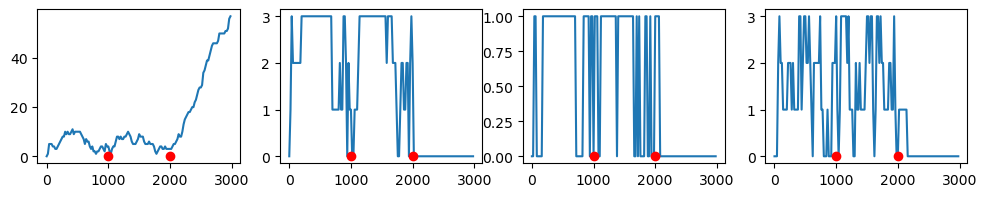

In [26]:
# visualize rooms:
import matplotlib.pyplot as plt

plot_stages = len(hospital.results['snapshots'][0]['patient_counts']) # plot each metric monitored by snapshots
fig, axs = plt.subplots(figsize=(3*plot_stages,2),ncols = plot_stages)
x = [s['time'] for s in hospital.results['snapshots']] # snapshot times on x-axis
for a in range(len(axs)):
    axs[a].plot(x,[s['patient_counts'][a] for s in hospital.results['snapshots']])
    axs[a].plot([1000,2000],[0,0],'ro') # example param changes

OR utilization: 0.888%
OR blocked for 9.700000000000001% of the time


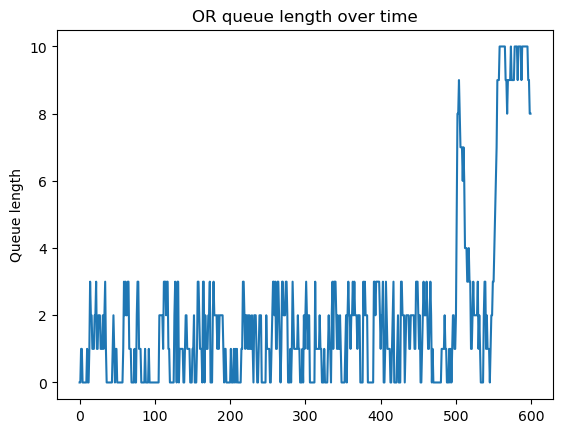

In [33]:
import numpy as np
queue_lengths = []#list of or queue lengths
blocked_time = hospital.results["or_time_blocked"]#total or blocked time
total_time = hospital.results["snapshots"][-1]["time"]#total simulation time
for snapshot in hospital.results["snapshots"]:
    queue_lengths.append(snapshot["or_queue"])

plt.plot(queue_lengths)

plt.title("OR queue length over time")
plt.ylabel("Queue length")

active_times = hospital.results["util_active"]
total_times  = hospital.results["total_active"]
print(f'OR utilization: {np.round(active_times[1]/total_times[1],3)}%')
print(f'OR blocked for {np.round(blocked_time/total_time,3)*100}% of the time')
